In [1]:
import re
import os
import pickle
import csv
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, roc_auc_score
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
def save_result(project_name, model_name, pred, probs, test_labels, fit_time, predict_time, model):
    
    fpr, tpr, thresholds = roc_curve(test_labels, probs, pos_label=1)
    roc_auc = auc(fpr, tpr)
    lw = 2
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_name)
    plt.legend(loc="lower right")
    plt.show()
                       
    csv_write = csv.writer(open('learning-rule.csv','a',newline=''), dialect='excel')
    csv_write.writerow([
        project_name, model_name, 
        roc_auc,
        precision_score(test_labels, pred, average= 'macro'), 
        recall_score(test_labels, pred, average= 'macro'),
        f1_score(test_labels, pred, average= 'macro'),
        accuracy_score(test_labels, pred), 
        fit_time, predict_time
    ])


In [3]:
TRUE_LABEL = [
    'Transient', 
    'False Alarm', 
    'Won\'t Fix', 
    'Unable To Reproduce', 
    'Customer Error',
    'Won\'t fix',
    'By Design',
]
TRUE_LABEL = list(set([i.upper() for i in TRUE_LABEL]))

LABELDICT = {}
for i in range(len(TRUE_LABEL)):
    LABELDICT[TRUE_LABEL[i]] = i
print(LABELDICT)    

def getLabel(x):
    if x.upper() in TRUE_LABEL:
        return 1
    
    return 0

{"WON'T FIX": 0, 'UNABLE TO REPRODUCE': 1, 'BY DESIGN': 2, 'FALSE ALARM': 3, 'TRANSIENT': 4, 'CUSTOMER ERROR': 5}


In [7]:
def project_do(project_name):
    print('====')
    print(project_name)
    print('====')
    tfidfVecorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.5, stop_words = 'english', max_features=1000)
    
    ROOTPATH = 'PATH'
    samples = pickle.load(open(ROOTPATH + project_name +  '_train_title_summary.pkl','rb'))
    samples_test = pickle.load(open(ROOTPATH + project_name +  '_test_title_summary.pkl','rb'))
    
    samples['Label'] = samples['Label'].apply(lambda x: getLabel(x))
    samples_test['Label'] = samples_test['Label'].apply(lambda x: getLabel(x))
    
    samples['tokenized'] = samples['tokenized'].apply(lambda x: (' ').join(x))
    all_tokenized = samples['tokenized']
    all_labels = samples['Label']
    print('load train set')    
    
    samples_test['tokenized'] = samples_test['tokenized'].apply(lambda x: (' ').join(x))   
    test_tokenized = samples_test['tokenized']
    test_labels = samples_test['Label']
    print('load test set')
    
    train_matrix = tfidfVecorizer.fit_transform(all_tokenized)
    print('train_matrix', train_matrix.shape)
    
    train_matrix_next = np.zeros(train_matrix.shape)
    train_matrix_next[0] = train_matrix[0].toarray().flatten()/2
    for i in range(train_matrix_next.shape[0]-1):
        train_matrix_next[i+1] =  (train_matrix_next[i] + train_matrix[i+1].toarray().flatten())/2
    print('train_matrix', train_matrix_next.shape)
    
    tfidfVecorizer_test = TfidfVectorizer(vocabulary = tfidfVecorizer.vocabulary_);
    test_matrix = tfidfVecorizer_test.fit_transform(test_tokenized)
    
    test_matrix_next = np.zeros(test_matrix.shape)
    test_matrix_next[0] = test_matrix[0].toarray().flatten()/2
    for i in range(test_matrix_next.shape[0]-1):
        test_matrix_next[i+1] =  (test_matrix_next[i] + test_matrix[i+1].toarray().flatten())/2
    print('test_matrix', test_matrix_next.shape)
    
    print('rule fit...', test_matrix.shape)
    start = time.clock()
    clf = tree.DecisionTreeClassifier(criterion="entropy")
    clf = clf.fit(train_matrix_next,all_labels)
    end = time.clock()
    print('rule predict...')
    start_p = time.clock()
    pred = clf.predict(test_matrix_next)
    end_p = time.clock()
    pred_proba = clf.predict_proba(test_matrix_next)
    pred_probs = [x[1] for x in pred_proba]
    print('rule save...')
    save_result(project_name, 'rule', pred, pred_probs, test_labels,end-start,end_p-start_p, clf)

====
Active Directory
====
load train set
load test set
train_matrix (90527, 1000)
train_matrix (90527, 1000)
test_matrix (38163, 1000)
rule fit... (38163, 1000)
rule predict...
rule save...


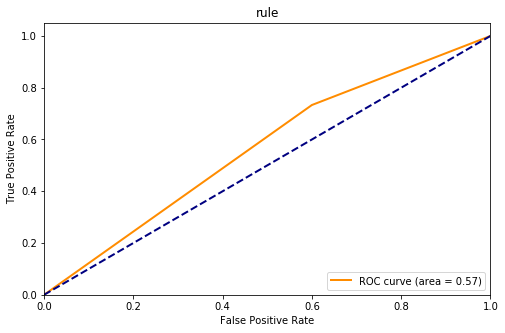

====
ASG Shared Data
====
load train set
load test set
train_matrix (17388, 1000)
train_matrix (17388, 1000)
test_matrix (6867, 1000)
rule fit... (6867, 1000)
rule predict...
rule save...


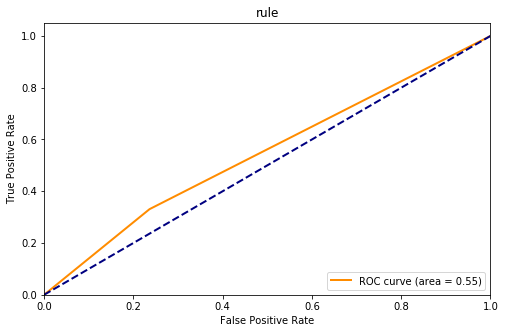

====
Azure
====
load train set
load test set
train_matrix (1551815, 1000)
train_matrix (1551815, 1000)
test_matrix (701911, 1000)
rule fit... (701911, 1000)
rule predict...
rule save...


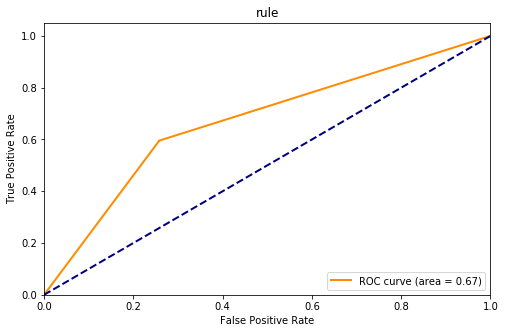

====
Bing
====
load train set
load test set
train_matrix (70720, 1000)
train_matrix (70720, 1000)
test_matrix (30071, 1000)
rule fit... (30071, 1000)
rule predict...
rule save...


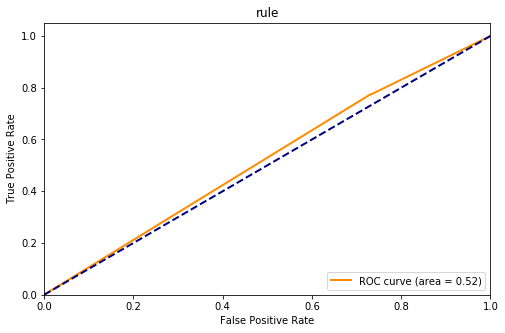

====
Bing Ads
====
load train set
load test set
train_matrix (89297, 1000)
train_matrix (89297, 1000)
test_matrix (41185, 1000)
rule fit... (41185, 1000)
rule predict...
rule save...


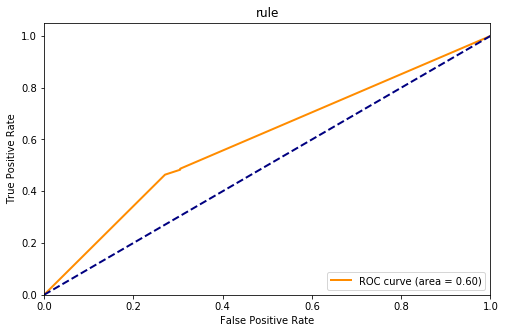

====
Cloud ES
====
load train set
load test set
train_matrix (27784, 1000)
train_matrix (27784, 1000)
test_matrix (16486, 1000)
rule fit... (16486, 1000)
rule predict...
rule save...


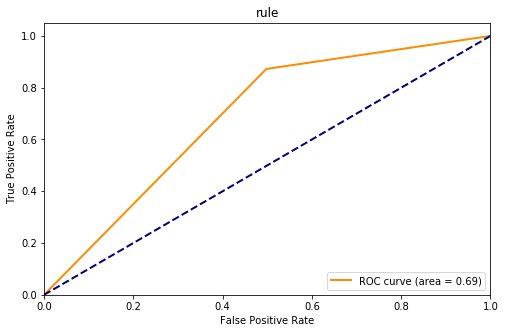

====
Core Platform Engineering
====
load train set
load test set
train_matrix (29239, 1000)
train_matrix (29239, 1000)
test_matrix (28617, 1000)
rule fit... (28617, 1000)
rule predict...
rule save...


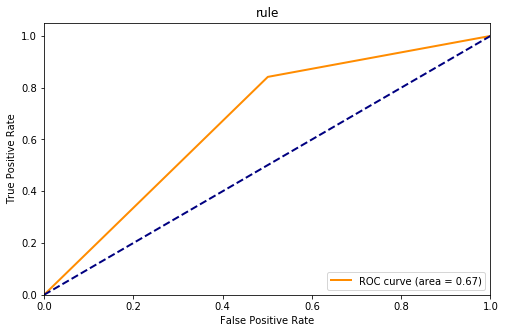

In [8]:
project_list = [
    'Active Directory',
    'ASG Shared Data',
    'Azure',
    'Bing',
    'Bing Ads',
    'Cloud ES',
    'Core Platform Engineering'
]
for line in project_list:
    project_do(line)

In [6]:
project_list = [
    #'Azure',
    'Microsoft Dynamics'
]
for line in project_list:
    try:
        project_do(line)
    except:
        print(line)

====
Microsoft Dynamics
====
load train set
load test set
Microsoft Dynamics


In [ ]:
'Active Directory',
'ASG Shared Data',
'Azure',
'Bing',
'Bing Ads',
'Cloud ES',
'Core Platform Engineering',
'Cortana',
'FAST',
'GAB',
#'Growth Ecosystems',
'Information Security',
'MCIO',
'Microsoft Business Operations',
'Microsoft Dynamics',
#'Office',
#'Office 365',
'OneDrive and SharePoint Online (ODSP)',
'Skype',
'Universal Store',
#'Visual Studio',
'Windows Defender',
'Windows Engineering System',
'Windows Server System Center',
#'Xbox'
